<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/4_4_Pre_processamento_(Parte_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré-processamento (Parte 3)

https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/breast-cancer/breast_cancer.csv')

In [ ]:
dados.head()

In [ ]:
dados.describe()

In [ ]:
dados.shape

In [ ]:
dados.isnull().sum()

## Removendo o Ruído através da discretização

Dividindo o atributo 'mean_radius' em 10 faixas

In [ ]:
bins = pd.qcut(dados['mean_radius'], 10)

a quantidade de valores aproximadamente igual em cada faixa pode ser comprovada pelo metodo value_counts

In [ ]:
bins.value_counts()

O metodo groupby permite que valores contidos na coluna de um DataFrame sejam agrupados segundo algum criterio. Neste exemplo, a coluna 'mean_radius' sera agrupada pelas faixas definidas pelo metodo qcut.

In [ ]:
grupos = dados['mean_radius'].groupby(bins)

Obtendo a media de cada faixa


In [ ]:
medias = grupos.mean()
medias

Obtendo a nova coluna. O metodo apply recebe como parametro uma funcao, aplica tal funcao a todos os seus elements e retorna um pandas.Series contendo os resultados. Neste caso, cada elemento de bins consiste no intervalo que o respectivo valor de 'mean_radius' pertence e, assim, a função informada em apply retornara a respectiva media de cada intervalo.

In [ ]:
novo_mean_radius = bins.apply(lambda x : medias[x])
novo_mean_radius

por fim, a coluna 'mean_radius' do DataFrame original é atualizada

In [ ]:
dados['mean_radius'] = novo_mean_radius

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Transformação de Dados

https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/cmc.csv')


In [ ]:
dados.head()

In [ ]:
dados.describe()

## Dados Simbólicos para numéricos

Uma abordagem bastante conhecida e utililizada para isso consiste na codificação 1-de-c (tambḿe conhecida como one-hot encoding). Nela, considerando que um atributo possua c valores possíveis, são criados c novos atributos binários, onde cada posição indica um possível valor do atributo nominal original. Desse modo, apenas uma posição da nova sequência binária de cada objeto poderá ser igual
a 1, indicando qual é o valor correspondente de um determinado objeto para o atributo original.

In [ ]:
# O atributo husband_occupation consiste em um atributo
# nominal com 4 valores possiveis.
# A conversao do mesmo para a codificacao 1-de-c eh
# feita como:
occ1dec = pd.get_dummies(dados['husband_occupation'])
occ1dec

a transformação dos valores inteiros para as suas respectivas representações binárias. (label enconding)

In [ ]:
# O atributo wife_education consiste em um atributo
# qualitativo ordinal com 4 valores possiveis.
# A conversao do mesmo para o codigo cinza pode ser
# feita pela aplicacao do metodo 'bin' na respectiva
# coluna do DataFrame. O metodo 'bin' recebe como entrada
# um valor inteiro e retorna uma string com a representacao
# binaria do mesmo.
wife_ed_binario = dados['wife_education'].apply(bin)
wife_ed_binario

# Dados numéricos para Simbólicos

Várias de técnicas de AM como, por exemplo, alguns algoritmos de árvore de decisão, exigem que os dados de entrada assumam valores qualitativos.

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/breast-cancer/breast_cancer.csv')

In [ ]:
# Obtendo a coluna 'mean_radius'.
mean_radius = dados['mean_radius']
# Discretizando a coluna 'mean_radius'.
# O parametro 'bins' define em quantos intervalos
# sera discretizado.
# O parametro labels define o rotulo de cada
# intervalo.
mean_radius

In [ ]:
# Neste caso, como labels eh igual a range(10),
# os intervalos serao discretizados com valores
# inteiros entre 0 e 9.
# O metodo pandas.cut discretiza em intervalos
# de larguras iguais. Caso deseje-se discretizar
# com frequencias iguais, deve-se utilizar o
# metodo pandas.qcut.
mean_radius_disc = pd.cut(mean_radius, bins=10, labels=range(10))
mean_radius_disc

In [ ]:
# Atualizando a respectiva coluna no DataFrame
# original.
dados['mean_radius'] = mean_radius_disc

## Normalização

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos


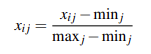


Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação

![image.png](
  
  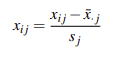
)

In [ ]:
import pandas
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/breast-cancer/breast_cancer.csv')

In [ ]:
# Obtendo os nomes das colunas do DataFrame
# como uma lista.
cols = list(dados.columns)
cols

In [ ]:
# Removendo da lista 'cols' os nomes
# 'sample_id' e 'diagnosis' que sao
# colunas que nao serao normalizadas
cols.remove('sample_id')
cols.remove('diagnosis')

In [ ]:
# Copiando os dados e aplicando a normalizacao
# por reescala nas colunas do DataFrame que contem
# valores continuos.
# Por padrao, o metodo minmax_scale reescala
# com min=0 e max=1.
dados_amp = dados.copy()
dados_amp[cols] = dados[cols].apply(minmax_scale)
dados_amp

In [ ]:
# Copiando os dados e aplicando a normalizacao
# por padronização a todas as colunas do DataFrame.
# Por padrao, o metodo scale subtrai a media e
# divide pelo desvio-padrao.
dados_dist = dados.copy()
dados_dist[cols] = dados[cols].apply(scale)
dados_dist

## Redução de Dimensionalidade

### PCA
O PCA consiste em uma técnica estatística que utiliza uma transformação linear para reexpressar um conjunto de atributos em um conjunto menor de atributos não correlacionados linearmente, mantendo boa parte das informações contidas nos dados originais

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/breast-cancer/breast_cancer.csv')

In [ ]:
# Obtendo os nomes das colunas.
cols = list(dados.columns)
# Removendo colunas que nao serao inclusas
# na reducao de dimensionalidade.
cols.remove('sample_id')
cols.remove('diagnosis')

In [ ]:
# Instanciando um PCA. O parametro n_components
# indica a quantidade de dimensoes que a base
# original sera reduzida.
pca = PCA(n_components=2, whiten=True)

In [ ]:
# Aplicando o pca na base breast_cancer.
# O atributo 'values' retorna um numpy.array
# de duas dimensões (matriz) contendo apenas
# os valores numericos do DataFrame.
dados_pca = pca.fit_transform(dados[cols].values)
dados_pca

In [ ]:
# O metodo fit_transform retorna outro numpy.array
# de dimensao numero_objetos x n_components.
# Apos isso, instancia-se um novo DataFrame contendo
# a base de dados original com dimensionalidade
# reduzida.
dados_pca = pd.DataFrame(dados_pca,
columns=['comp1', 'comp2'])
dados_pca